# Principal component analysis (PCA) / Метод главных компонент (МГК)
# T-distributed Stochastic Neighbor Embedding (t-SNE) / t-распределенное стохастическое вложение соседей
# Uniform manifold approximation and projection (UMAP) / Аппроксимация и проекция равномерного многообразия


---

**Источники:**

[Principal Component Analysis and k-means Clustering to Visualize a High Dimensional Dataset](https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2)

[PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)

[Feature Extraction using Principal Component Analysis — A Simplified Visual Demo](https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a)

[Метод главных компонент](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82)

[Стохастическое вложение соседей с t-распределением](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B2%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%D1%81_t-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC)

[2.2.9. t-distributed Stochastic Neighbor Embedding (t-SNE)](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

[How Exactly UMAP Works](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)

[tSNE vs. UMAP: Global Structure](https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17)

[Dimensionality Reduction for Data Visualization: PCA vs TSNE vs UMAP vs LDA](https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29)

[UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/index.html)

[UMAP](https://ru.wikipedia.org/wiki/UMAP)

[Dimensionality reduction](https://nbisweden.github.io/excelerate-scRNAseq/session-dim-reduction/lecture_dimensionality_reduction.pdf)

[Visualizing Structure and Transitions for Biological
Data Exploration](https://www.biorxiv.org/content/biorxiv/early/2018/06/28/120378.full.pdf)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install -c conda-forge umap-learn -y

In [4]:
# !pip install ipython-autotime

In [5]:
import numpy as np

np.__version__

'1.20.2'

In [6]:
import pandas as pd

pd.__version__

'1.2.4'

In [7]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [8]:
import seaborn as sns

sns.__version__

'0.11.1'

In [9]:
import sklearn

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer

sklearn.__version__

'0.24.2'

In [10]:
import umap
from umap import UMAP

umap.__version__

'0.5.1'

In [11]:
import missingno as msno

msno.__version__

'0.4.2'

In [12]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## Описание PCA

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Метод главных компонент (англ. principal component analysis, PCA)** — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 

Изобретён Карлом Пирсоном в 1901 году.

PCA работает, идентифицируя **гиперплоскость, которая находится ближе всего к данным, а затем проецирует данные на эту гиперплоскость, сохраняя при этом большую часть вариаций в наборе данных**.

Применяется во многих областях, в том числе, в эконометрике, биоинформатике, обработке изображений, для сжатия данных, в общественных науках.

**Метод главных компонент применим всегда.**

Распространённое утверждение о том, что он применим только к нормально распределённым данным (или для распределений, близких к нормальным) неверно: в исходной формулировке Пирсона ставится задача об аппроксимации конечного множества данных и отсутствует даже гипотеза об их статистическом порождении, не говоря уж о распределении.

<img src="images/pca_original_component.gif"/>

### Примеры использования

- Визуализация данных — представление в наглядной форме данных эксперимента или результатов теоретического исследования.
- Компрессия изображений и видео (на данный момент этот метод активно не используется, в основном из-за большой вычислительной сложности).
- Подавление шума на изображениях — при удалении шума из блока пикселей представить окрестность этого блока в виде набора точек в многомерном пространстве, применить к нему PCA и оставить только первые компоненты преобразования. 
- Индексация видео — представить при помощи PCA каждый кадр видео несколькими значениями, которые в дальнейшем будут использоваться при построении базы данных и запросам к ней. Столь существенная редукция данных позволяет значительно увеличить скорость работы и устойчивость к ряду искажений в видео.
- Биоинформатика — используется в биоинформатике для сокращения размерности описания, выделения значимой информации, визуализации данных и др.
- ...

<img src="images/explained_variance_ratio_1.png"/>

<img src="images/explained_variance_ratio_2.png" width=300/>

## Описание t-SNE

[sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**t-SNE** - это инструмент для визуализации многомерных данных. 

**t-SNE** является техникой нелинейного снижения размерности, хорошо подходящей для вложения данных высокой размерности для визуализации в пространство низкой размерности (двух или трехмерное). В частности, метод моделирует каждый объект высокой размерности двух или трёхмерной точкой таким образом, что похожие объекты моделируются близко расположенными точками, а непохожие точки моделируются с большой вероятностью точками, далеко друг от друга отстоящими.

**t-SNE** имеет функцию стоимости, которая не является выпуклой, т.е. при разных инициализациях можно получить разные результаты.

Поскольку **t-SNE** отображения часто используются для **показа кластеров**, а на визуализацию кластеров может оказывать **значительное влияние выбранная параметризация**, постольку необходимо умение работать с параметрами алгоритма t-SNE. 

<img src="images/tsne_vs_pca.png"/>


Для выбора параметров и проверки результатов могут оказаться необходимы интерактивные исследования. Было продемонстрировано, что алгоритм t-SNE часто способен обнаружить хорошо отделённые друг от друга кластеры.

<img src="images/tsne_perplexity.png"/>

**Преимущества:**
- Выявление структуры в разных масштабах на одной карте.
- Выявление данных, которые лежат в нескольких разных [топологических многообразиях (manifolds)](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%B8%D0%B5) или кластерах.
- Снижение тенденции к скоплению точек вместе в центре.

**Недостатки:**
- **t-SNE требует больших вычислительных ресурсов и может занять несколько часов на наборах данных с миллионами выборок, тогда как PCA завершится за секунды или минуты.**
- Алгоритм является **стохастическим**, и несколько перезапусков с разными начальными числами могут привести к разным embedding-ам. Однако вполне законно выбрать встраивание с наименьшей ошибкой.
- **Глобальная структура явно не сохраняется**. Эта проблема смягчается за счет инициализации точек с помощью PCA (с использованием init = 'pca').

## Описание UMAP

[UMAP API](https://umap-learn.readthedocs.io/en/latest/api.html)

**Uniform Manifold Approximation and Projection (UMAP)** — алгоритм машинного обучения, выполняющий **нелинейное снижение размерности**.

**UMAP** был создан Лилендом Макиннесом совместно с его коллегами из Таттского института. Целью было получить алгоритм, **похожий на t-SNE**, но с более сильным математическим обоснованием.

UMAP имеет **гиперпараметры**, которые могут сильно повлиять на результирующие embedding-и:
- `n_neighbors` определяет, как UMAP уравновешивает локальную и глобальную структуру данных. При низких значениях `n_neighbours` заставляют UMAP сосредоточиться на очень локальных структурах, в то время как более высокие значения заставят UMAP сосредоточиться на более крупных окрестностях.
- `min_dist` определяет, насколько тесно UMAP может объединять точки. Меньшие значения означают, что точки будут сгруппированы близко, и наоборот.
- `n_components` позволяет пользователю определять размерность уменьшенного пространства (обычно 2D или 3D).
- `metric` определяет, как вычисляется расстояние в окружающем пространстве входных данных. Очень сильно меняет внешний вид результата!

## Рекомендации

<img src="images/pca_tsne_umap.png"/>

- Убедитесь, что **для всех признаков используется один и тот же масштаб**. Поскольку методы обучения **основаны на поиске ближайшего соседа**, в противном случае алгоритм может работать плохо. Например, `StandardScaler` для масштабирования разнородных данных.

- Обратите внимание, что **зашумленные данные могут испортить** результаты, которые в противном случае были бы хорошо разделены. Обучение на зашумленных и/или неполных данных — активная область исследований.

- Главный **недостаток PCA** заключается в том, что на него сильно влияют **выбросы**, присутствующие в данных. PCA - это линейная проекция, что означает, что он **не может фиксировать нелинейные зависимости**, его цель — найти направления (так называемые главные компоненты), которые максимизируют дисперсию в наборе данных.

- **t-SNE работает лучше** (пытается сохранить структуру соседства топологии) **по сравнению с PCA**, когда дело доходит до визуализации различных паттернов кластеров. Подобные метки группируются вместе, даже если есть большие скопления точек данных друг над другом, что явно недостаточно, чтобы ожидать хорошей работы алгоритма кластеризации.

- **UMAP превзошел t-SNE и PCA**, если посмотреть на 2d и 3d график, можно увидеть мини-кластеры, которые хорошо разделяются. 

- **UMAP намного быстрее, чем t-SNE**.

- Нетрудно попасть в ловушку, предполагая, что один метод лучше, чем другой. В конце концов, **не существует способа отобразить многомерные данные в низкие измерения и в то же время сохранить всю структуру**, есть всегда есть компромисс между качествами одной техники по сравнению с другой.

---

- **Для ускорения обучения моделей - PCA.**
- **Для визуализации - PCA (если нужно быстро) или UMAP (если нужно качественно).**
- **UMAP заменил t-SNE, но в старом коде встречается, нужно быть знакомым, но использовать не стоит.**

---

In [13]:
%unload_ext autotime

The autotime extension is not loaded.


## Customer Clustering

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [14]:
df_1 = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df_1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


### Анализ данных

#### Типы данных

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


#### Пропущенные значения

In [16]:
df_1.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### Распределение данных

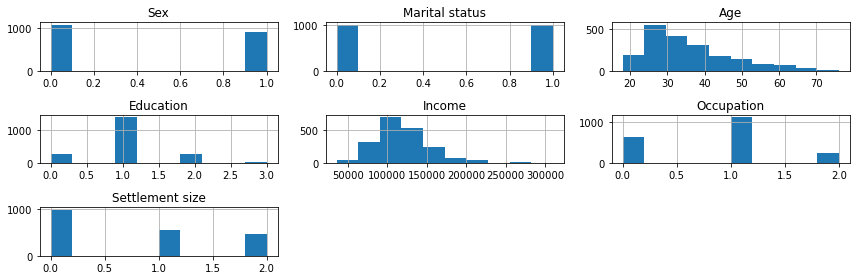

In [17]:
df_1.hist(figsize=(12, 4))
plt.tight_layout()

### Подготовка

#### Масштабирование

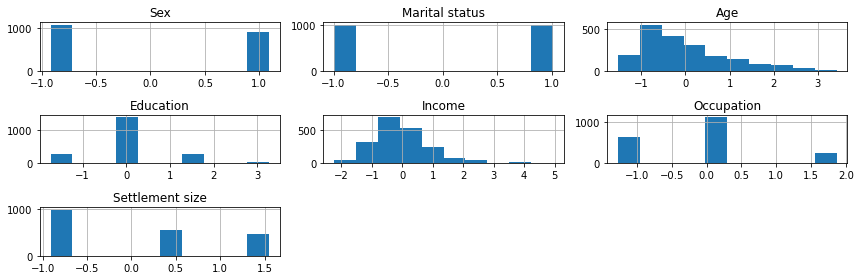

In [18]:
df_1_norm = pd.DataFrame(StandardScaler().fit_transform(df_1), columns=df_1.columns)
df_1_norm.hist(figsize=(12, 4))
plt.tight_layout()

#### Полезные функции

In [19]:
def explained_variance_plot(pca_obj):
    features = range(pca_obj.n_components_)
    cumulative_sum = np.cumsum(pca_obj.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)
    
    plt.bar(features, pca_obj.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')
    
    plt.legend(loc='best')
    plt.tight_layout()

In [20]:
%load_ext autotime

time: 382 µs (started: 2021-06-16 18:28:23 +03:00)


### N-D PCA

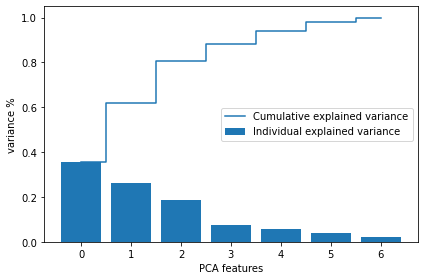

time: 240 ms (started: 2021-06-16 18:28:23 +03:00)


In [21]:
pca = PCA()
pca.fit(df_1_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

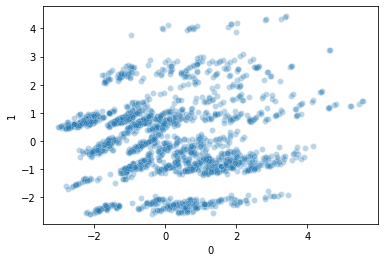

time: 178 ms (started: 2021-06-16 18:28:23 +03:00)


In [22]:
pca_2 = PCA(n_components=2)
df_1_pca_2 = pd.DataFrame(pca_2.fit_transform(df_1_norm))
sns.scatterplot(x=df_1_pca_2[0], y=df_1_pca_2[1], alpha=0.3)

### 2-D t-SNE

<AxesSubplot:xlabel='0', ylabel='1'>

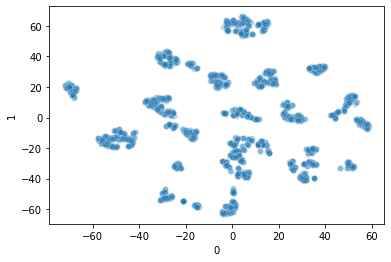

time: 6.15 s (started: 2021-06-16 18:28:24 +03:00)


In [23]:
tsne_2 = TSNE(n_components=2)
df_1_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df_1_norm))
sns.scatterplot(x=df_1_tsne_2[0], y=df_1_tsne_2[1], alpha=0.3)

### 2-D UMAP

<AxesSubplot:xlabel='0', ylabel='1'>

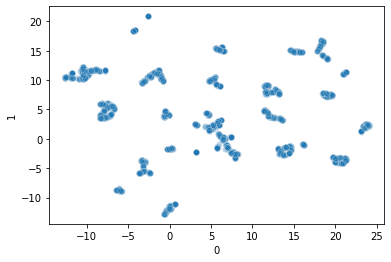

time: 11.6 s (started: 2021-06-16 18:28:30 +03:00)


In [24]:
umap_2 = UMAP(n_components=2)
df_1_umap_2 = pd.DataFrame(umap_2.fit_transform(df_1_norm))
sns.scatterplot(x=df_1_umap_2[0], y=df_1_umap_2[1], alpha=0.3)

### 3-D PCA

In [25]:
pca_3 = PCA(n_components=3)
df_1_pca_3 = pd.DataFrame(pca_3.fit_transform(df_1_norm))

time: 23.2 ms (started: 2021-06-16 18:28:41 +03:00)


In [135]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_1_pca_3[0], df_1_pca_3[1], df_1_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 46 ms (started: 2021-06-16 18:33:37 +03:00)


In [27]:
%matplotlib inline

time: 1.81 ms (started: 2021-06-16 18:28:41 +03:00)


### 3-D t-SNE

In [28]:
tsne_3 = TSNE(n_components=3)
df_1_tsne_3 = pd.DataFrame(tsne_3.fit_transform(df_1_norm))

time: 19.7 s (started: 2021-06-16 18:28:41 +03:00)


In [136]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=130, elev=40)

ax.scatter(df_1_tsne_3[0], df_1_tsne_3[1], df_1_tsne_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 56.6 ms (started: 2021-06-16 18:34:25 +03:00)


In [30]:
%matplotlib inline

time: 3.67 ms (started: 2021-06-16 18:29:01 +03:00)


### 3-D UMAP

In [31]:
umap_3 = UMAP(n_components=3)
df_1_umap_3 = pd.DataFrame(umap_3.fit_transform(df_1_norm))

time: 6.39 s (started: 2021-06-16 18:29:01 +03:00)


In [137]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_1_umap_3[0], df_1_umap_3[1], df_1_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 39.1 ms (started: 2021-06-16 18:34:28 +03:00)


In [33]:
%matplotlib inline

time: 1.7 ms (started: 2021-06-16 18:29:08 +03:00)


---

## Credit Card Dataset for Clustering

### Загрузка данных

[Источник (Credit Card Dataset for Clustering)](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [34]:
df_2 = pd.read_csv("./../../data/CC GENERAL.csv", index_col=0)
df_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


time: 50.6 ms (started: 2021-06-16 18:29:08 +03:00)


### Анализ данных

#### Типы данных

In [35]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

#### Пропущенные значения

In [36]:
df_2.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

time: 8.15 ms (started: 2021-06-16 18:29:08 +03:00)


#### Распределение данных

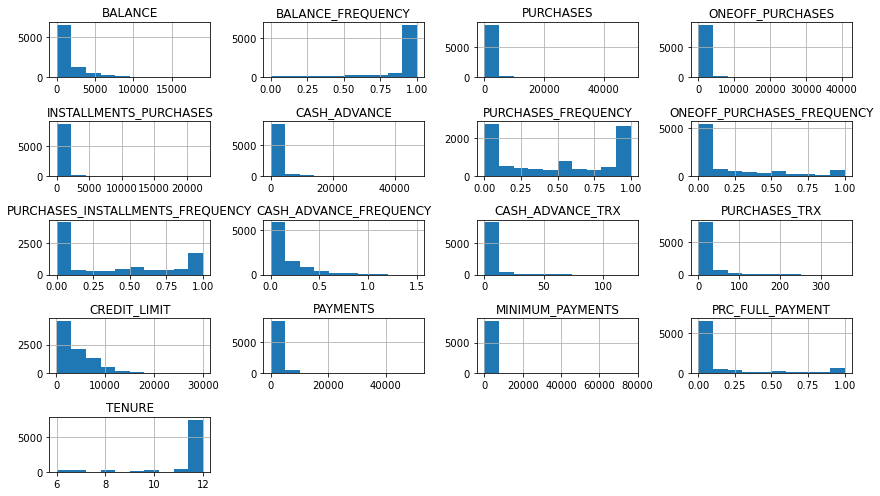

time: 2.25 s (started: 2021-06-16 18:29:08 +03:00)


In [37]:
df_2.hist(figsize=(12, 7))
plt.tight_layout()

### Подготовка

#### Пропущенные значения

In [38]:
df_2_without_na = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_2), columns=df_2.columns)
df_2_without_na.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

time: 22.9 ms (started: 2021-06-16 18:29:10 +03:00)


#### Масштабирование

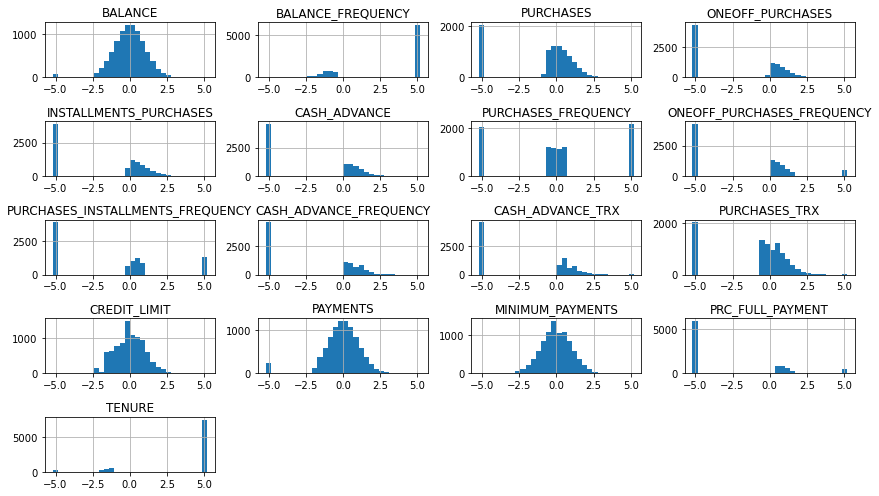

time: 3.18 s (started: 2021-06-16 18:29:10 +03:00)


In [39]:
norm_trans = QuantileTransformer(output_distribution='normal')
df_2_norm = pd.DataFrame(norm_trans.fit_transform(df_2_without_na), columns=df_2.columns)
df_2_norm.hist(bins=30, figsize=(12, 7))
plt.tight_layout()

In [40]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 738 µs (started: 2021-06-16 18:29:13 +03:00)


### N-D PCA

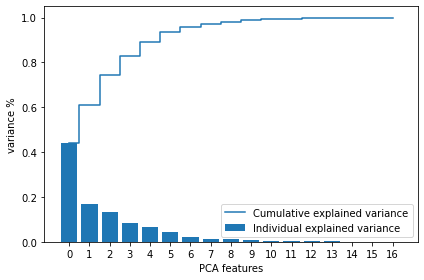

time: 487 ms (started: 2021-06-16 18:29:13 +03:00)


In [41]:
pca = PCA()
pca.fit(df_2_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

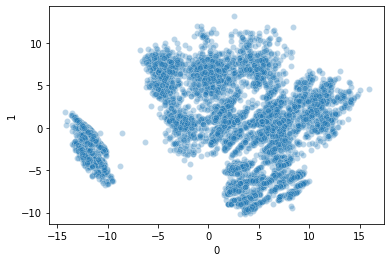

time: 244 ms (started: 2021-06-16 18:29:14 +03:00)


In [42]:
pca_2 = PCA(n_components=2)
df_2_pca_2 = pd.DataFrame(pca_2.fit_transform(df_2_norm))
sns.scatterplot(x=df_2_pca_2[0], y=df_2_pca_2[1], alpha=0.3)

### 2-D t-SNE

<AxesSubplot:xlabel='0', ylabel='1'>

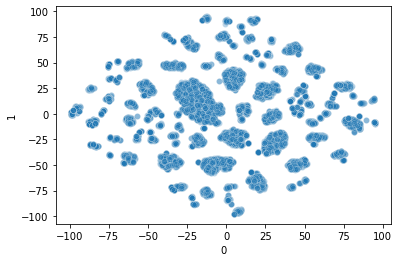

time: 37.3 s (started: 2021-06-16 18:29:14 +03:00)


In [43]:
tsne_2 = TSNE(n_components=2)
df_2_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df_2_norm))
sns.scatterplot(x=df_2_tsne_2[0], y=df_2_tsne_2[1], alpha=0.3)

### 2-D UMAP

<AxesSubplot:xlabel='0', ylabel='1'>

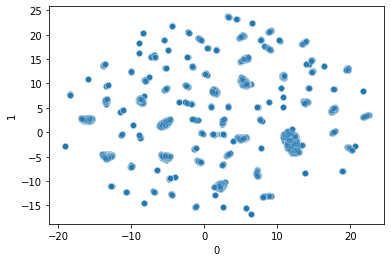

time: 27.1 s (started: 2021-06-16 18:29:51 +03:00)


In [44]:
umap_2 = UMAP(n_components=2)
df_2_umap_2 = pd.DataFrame(umap_2.fit_transform(df_2_norm))
sns.scatterplot(x=df_2_umap_2[0], y=df_2_umap_2[1], alpha=0.3)

### 3-D PCA

In [45]:
pca_3 = PCA(n_components=3)
df_2_pca_3 = pd.DataFrame(pca_3.fit_transform(df_2_norm))
df_2_pca_3

,0,1,2
0,2.163699,-6.912246,-0.353669
1,-11.234460,-3.138915,-0.281445
2,4.975619,5.658303,-7.210849
3,-3.872844,4.528866,-4.249755
4,0.612076,1.129461,-6.505020
...,...,...,...
8945,5.714757,-6.516668,1.963035
8946,4.694801,-4.960993,2.387508
8947,3.275390,-8.942454,-0.812840
8948,-10.979687,-5.694503,-2.295634


time: 67.6 ms (started: 2021-06-16 18:30:19 +03:00)


In [138]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-120, elev=-25)

ax.scatter(df_2_pca_3[0], df_2_pca_3[1], df_2_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 49.3 ms (started: 2021-06-16 18:34:38 +03:00)


In [47]:
%matplotlib inline

time: 3.92 ms (started: 2021-06-16 18:30:19 +03:00)


### 3-D t-SNE

In [48]:
tsne_3 = TSNE(n_components=3)
df_2_tsne_3 = pd.DataFrame(tsne_3.fit_transform(df_2_norm))

time: 1min 44s (started: 2021-06-16 18:30:19 +03:00)


In [139]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=85, elev=20)

ax.scatter(df_2_tsne_3[0], df_2_tsne_3[1], df_2_tsne_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 42.8 ms (started: 2021-06-16 18:34:40 +03:00)


In [50]:
%matplotlib inline

time: 2.24 ms (started: 2021-06-16 18:32:03 +03:00)


### 3-D UMAP

In [51]:
umap_3 = UMAP(n_components=3)
df_2_umap_3 = pd.DataFrame(umap_3.fit_transform(df_2_norm))

time: 20.5 s (started: 2021-06-16 18:32:03 +03:00)


In [140]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-165, elev=30)

ax.scatter(df_2_umap_3[0], df_2_umap_3[1], df_2_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 41.1 ms (started: 2021-06-16 18:34:44 +03:00)


In [53]:
%matplotlib inline

time: 1.89 ms (started: 2021-06-16 18:32:24 +03:00)


---

In [54]:
%unload_ext autotime

## Simple Clustering Data ID Gender Income Spending

### Загрузка данных

[Источник (Simple Clustering Data ID Gender Income Spending)](https://www.kaggle.com/harrimansaragih/clustering-data-id-gender-income-spending)

In [55]:
df_3 = pd.read_csv("./../../data/ClusteringHSS.csv", index_col=0)
df_3

,Gender_Code,Region,Income,Spending
ID,,,,
1,Female,Rural,20.0,15.0
2,Male,Rural,5.0,12.0
3,Female,Urban,28.0,18.0
4,Male,Urban,40.0,10.0
5,Male,Urban,42.0,9.0
...,...,...,...,...
1109,Female,Urban,33.0,16.0
1110,Male,Urban,48.0,7.0
1111,Male,Urban,31.0,16.0


### Анализ данных

#### Типы данных

In [56]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 1 to 1113
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender_Code  1107 non-null   object 
 1   Region       1107 non-null   object 
 2   Income       1107 non-null   float64
 3   Spending     1108 non-null   float64
dtypes: float64(2), object(2)
memory usage: 43.5+ KB


#### Пропущенные значения

In [57]:
df_3.isna().sum()

Gender_Code    6
Region         6
Income         6
Spending       5
dtype: int64

In [58]:
# процент пропущенных значений в каждой колонке
percent_missing = round(df_3.isnull().mean()*100, 2)
percent_missing.sort_values(ascending=False)

Gender_Code    0.54
Region         0.54
Income         0.54
Spending       0.45
dtype: float64

<AxesSubplot:>

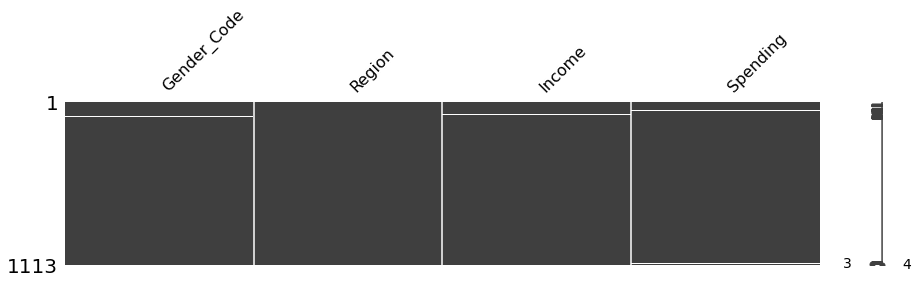

In [59]:
msno.matrix(df_3, figsize=(15, 3))

#### Распределение данных

In [60]:
df_3.Gender_Code.value_counts()

Male      572
Female    535
Name: Gender_Code, dtype: int64

In [61]:
df_3.Region.value_counts()

Rural    558
Urban    549
Name: Region, dtype: int64

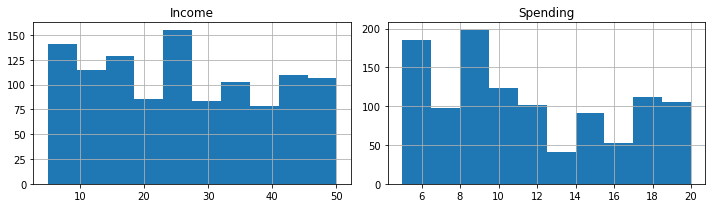

In [62]:
df_3.hist(figsize=(10, 3))
plt.tight_layout()

### Подготовка

#### Пропущенные значения

In [63]:
# удалить все СТРОКИ с пропущенными ячейками
# сохранить результат в новой переменной
df_3_without_na = df_3.dropna(axis='rows').reset_index(drop=True)
df_3_without_na.isna().sum()

Gender_Code    0
Region         0
Income         0
Spending       0
dtype: int64

#### Масштабирование

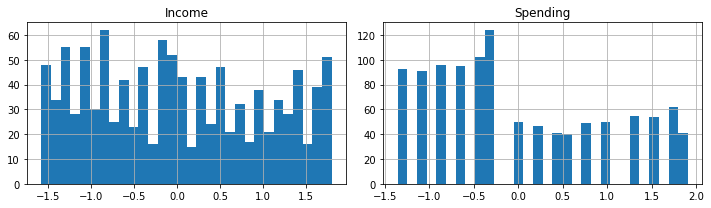

In [64]:
# norm_trans = QuantileTransformer(output_distribution='normal')
norm_trans = StandardScaler()
df_3_norm = pd.DataFrame(norm_trans.fit_transform(df_3_without_na[['Income', 'Spending']]), columns=['Income', 'Spending'])
df_3_norm.hist(bins=30, figsize=(10, 3))
plt.tight_layout()

#### Категориальные признаки

In [65]:
enc = OrdinalEncoder()
df_3_without_na[['is_Male', 'is_Urban']] = enc.fit_transform(df_3_without_na[['Gender_Code', 'Region']])
df_3_without_na[['Gender_Code', 'is_Male', 'Region', 'is_Urban']]

,Gender_Code,is_Male,Region,is_Urban
0,Female,0.0,Rural,0.0
1,Male,1.0,Rural,0.0
2,Female,0.0,Urban,1.0
3,Male,1.0,Urban,1.0
4,Male,1.0,Urban,1.0
...,...,...,...,...
1085,Female,0.0,Urban,1.0
1086,Male,1.0,Urban,1.0
1087,Male,1.0,Urban,1.0
1088,Male,1.0,Urban,1.0


In [66]:
df_3_norm = df_3_norm.join(df_3_without_na[['is_Male', 'is_Urban']])
df_3_norm

,Income,Spending,is_Male,is_Urban
0,-0.450770,0.819166,0.0,0.0
1,-1.573918,0.166150,1.0,0.0
2,0.148242,1.472182,0.0,1.0
3,1.046760,-0.269194,1.0,1.0
4,1.196513,-0.486867,1.0,1.0
...,...,...,...,...
1085,0.522624,1.036838,0.0,1.0
1086,1.645772,-0.922211,1.0,1.0
1087,0.372871,1.036838,1.0,1.0
1088,1.795525,0.601494,1.0,1.0


In [67]:
%load_ext autotime

time: 228 µs (started: 2021-06-16 18:32:25 +03:00)


### N-D PCA

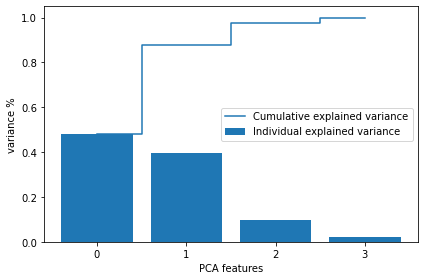

time: 225 ms (started: 2021-06-16 18:32:25 +03:00)


In [68]:
pca = PCA()
pca.fit(df_3_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

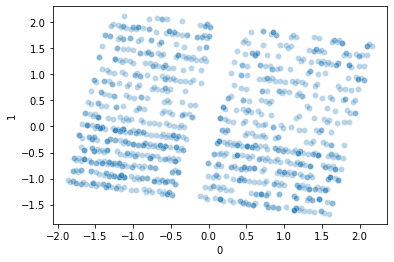

time: 233 ms (started: 2021-06-16 18:32:25 +03:00)


In [69]:
pca_2 = PCA(n_components=2)
df_3_pca_2 = pd.DataFrame(pca_2.fit_transform(df_3_norm))
sns.scatterplot(x=df_3_pca_2[0], y=df_3_pca_2[1], alpha=0.3)

### 2-D t-SNE

<AxesSubplot:xlabel='0', ylabel='1'>

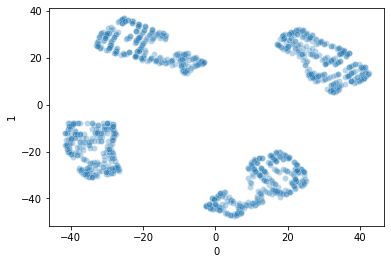

time: 5.34 s (started: 2021-06-16 18:32:26 +03:00)


In [70]:
tsne_2 = TSNE(n_components=2)
df_3_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df_3_norm))
sns.scatterplot(x=df_3_tsne_2[0], y=df_3_tsne_2[1], alpha=0.3)

### 2-D UMAP

<AxesSubplot:xlabel='0', ylabel='1'>

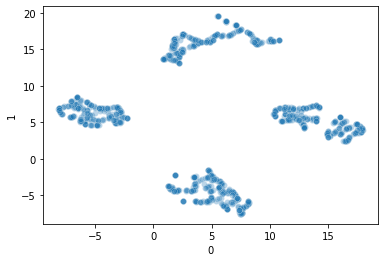

time: 3.93 s (started: 2021-06-16 18:32:31 +03:00)


In [71]:
umap_2 = UMAP(n_components=2)
df_3_umap_2 = pd.DataFrame(umap_2.fit_transform(df_3_norm))
sns.scatterplot(x=df_3_umap_2[0], y=df_3_umap_2[1], alpha=0.3)

### 3-D PCA

In [72]:
pca_3 = PCA(n_components=3)
df_3_pca_3 = pd.DataFrame(pca_3.fit_transform(df_3_norm))
df_3_pca_3

,0,1,2
0,-0.479088,0.935988,0.452970
1,-1.564357,0.425079,-0.554980
2,0.577977,1.412554,0.481493
3,1.114243,-0.488559,-0.420385
4,1.210370,-0.726368,-0.407177
...,...,...,...
1085,0.837343,0.925103,0.510264
1086,1.536847,-1.225652,-0.376052
1087,0.738819,0.902799,-0.492568
1088,1.937751,0.249688,-0.430830


time: 17.5 ms (started: 2021-06-16 18:32:35 +03:00)


In [141]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-100, elev=30)

ax.scatter(df_3_pca_3[0], df_3_pca_3[1], df_3_pca_3[2], 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 40.4 ms (started: 2021-06-16 18:34:55 +03:00)


In [74]:
%matplotlib inline

time: 2.1 ms (started: 2021-06-16 18:32:35 +03:00)


### 3-D t-SNE

In [75]:
tsne_3 = TSNE(n_components=3)
df_3_tsne_3 = pd.DataFrame(tsne_3.fit_transform(df_3_norm))

time: 6.65 s (started: 2021-06-16 18:32:35 +03:00)


In [142]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-25, elev=30)

ax.scatter(df_3_tsne_3[0], df_3_tsne_3[1], df_3_tsne_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 38.9 ms (started: 2021-06-16 18:34:58 +03:00)


In [77]:
%matplotlib inline

time: 3.82 ms (started: 2021-06-16 18:32:42 +03:00)


### 3-D UMAP

In [78]:
umap_3 = UMAP(n_components=3)
df_3_umap_3 = pd.DataFrame(umap_3.fit_transform(df_3_norm))

time: 3.98 s (started: 2021-06-16 18:32:42 +03:00)


In [143]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=170, elev=20)

ax.scatter(df_3_umap_3[0], df_3_umap_3[1], df_3_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 39.4 ms (started: 2021-06-16 18:35:01 +03:00)


In [80]:
%matplotlib inline

time: 1.91 ms (started: 2021-06-16 18:32:46 +03:00)


--- 

In [81]:
%unload_ext autotime

## Customer Segmentation

### Загрузка данных

[Источник (custDatasets)](https://www.kaggle.com/gangliu/custdatasets)

In [82]:
df_4 = pd.read_csv("./../../data/Cust_Segmentation.csv", index_col=0)
df_4

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4


### Анализ данных

#### Типы данных

In [83]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   Address          850 non-null    object 
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 66.4+ KB


#### Пропущенные значения

In [84]:
df_4.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [85]:
# процент пропущенных значений в каждой колонке
percent_missing = round(df_4.isnull().mean()*100, 2)
percent_missing.sort_values(ascending=False)

Defaulted          17.65
Age                 0.00
Edu                 0.00
Years Employed      0.00
Income              0.00
Card Debt           0.00
Other Debt          0.00
Address             0.00
DebtIncomeRatio     0.00
dtype: float64

<AxesSubplot:>

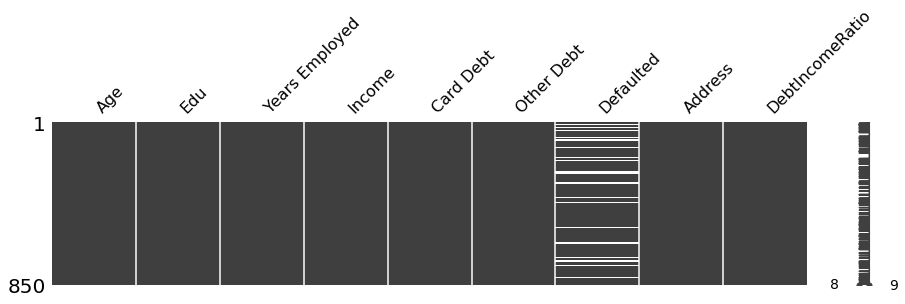

In [86]:
msno.matrix(df_4, figsize=(15, 3))

#### Распределение данных

In [87]:
df_4.Address.value_counts()

NBA001    71
NBA002    71
NBA000    60
NBA004    58
NBA003    55
NBA006    50
NBA008    49
NBA009    45
NBA005    43
NBA007    41
NBA010    37
NBA011    36
NBA012    28
NBA014    24
NBA013    22
NBA016    22
NBA017    20
NBA015    18
NBA019    16
NBA018    14
NBA023    11
NBA026    10
NBA021    10
NBA022     9
NBA025     9
NBA020     8
NBA027     4
NBA024     4
NBA031     2
NBA034     1
NBA030     1
NBA029     1
Name: Address, dtype: int64

In [88]:
df_4.Defaulted.value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

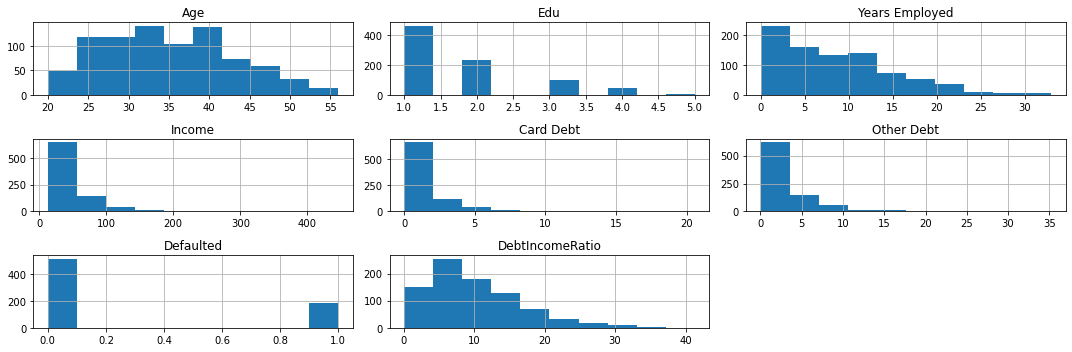

In [89]:
df_4.hist(figsize=(15, 5))
plt.tight_layout()

### Подготовка

#### Пропущенные значения

In [90]:
df_4_without_na = df_4.copy()
df_4_without_na['Defaulted'].fillna(0, inplace=True)
df_4_without_na['Defaulted'].isna().sum()

0

#### Масштабирование

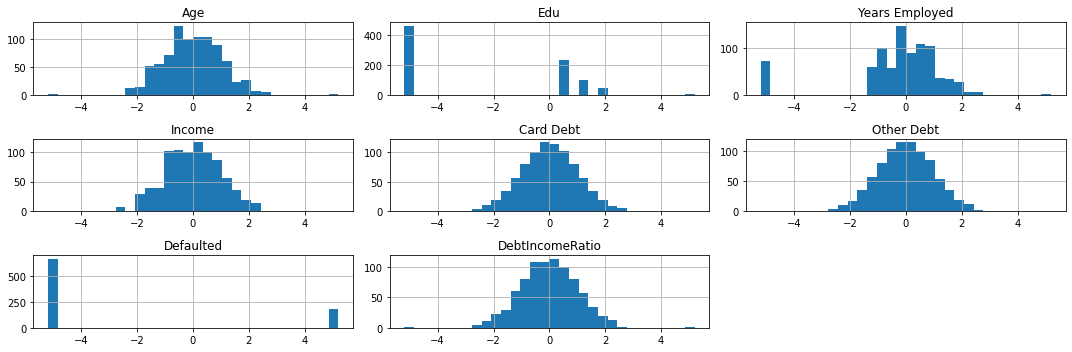

In [91]:
num_cols = df_4_without_na.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution='normal', n_quantiles=100)
# norm_trans = StandardScaler()
df_4_norm = pd.DataFrame(norm_trans.fit_transform(df_4_without_na[num_cols]), columns=num_cols)
df_4_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

#### Категориальные признаки

In [92]:
#TODO

In [93]:
%load_ext autotime

time: 244 µs (started: 2021-06-16 18:32:49 +03:00)


### N-D PCA

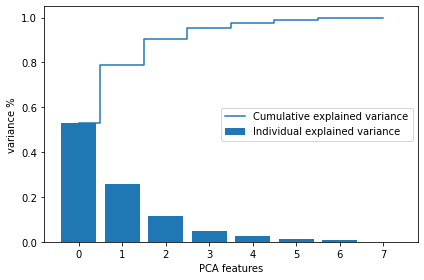

time: 255 ms (started: 2021-06-16 18:32:49 +03:00)


In [94]:
pca = PCA()
pca.fit(df_4_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

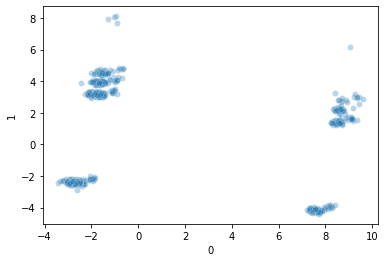

time: 220 ms (started: 2021-06-16 18:32:50 +03:00)


In [95]:
pca_2 = PCA(n_components=2)
df_4_pca_2 = pd.DataFrame(pca_2.fit_transform(df_4_norm))
sns.scatterplot(x=df_4_pca_2[0], y=df_4_pca_2[1], alpha=0.3)

### 2-D t-SNE

<AxesSubplot:xlabel='0', ylabel='1'>

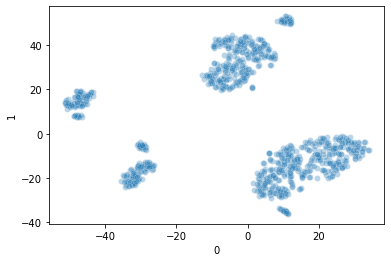

time: 2.89 s (started: 2021-06-16 18:32:50 +03:00)


In [96]:
tsne_2 = TSNE(n_components=2)
df_4_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df_4_norm))
sns.scatterplot(x=df_4_tsne_2[0], y=df_4_tsne_2[1], alpha=0.3)

### 2-D UMAP

<AxesSubplot:xlabel='0', ylabel='1'>

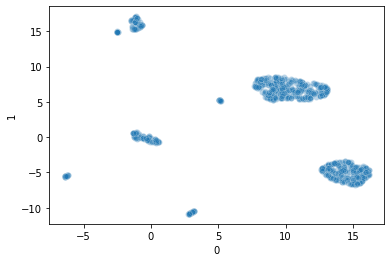

time: 3.74 s (started: 2021-06-16 18:32:53 +03:00)


In [97]:
umap_2 = UMAP(n_components=2)
df_4_umap_2 = pd.DataFrame(umap_2.fit_transform(df_4_norm))
sns.scatterplot(x=df_4_umap_2[0], y=df_4_umap_2[1], alpha=0.3)

### 3-D PCA

In [98]:
pca_3 = PCA(n_components=3)
df_4_pca_3 = pd.DataFrame(pca_3.fit_transform(df_4_norm))
df_4_pca_3

,0,1,2
0,-1.833423,3.032632,1.124055
1,-2.867573,-2.290697,-3.562761
2,8.547375,1.478435,-2.491759
3,-1.697999,3.053714,1.603587
4,-2.979362,-2.197725,-4.377647
...,...,...,...
845,-2.635698,-2.407796,1.074375
846,-1.759733,3.158969,0.525164
847,9.591740,2.886064,2.843231
848,-2.935493,-2.465072,0.896589


time: 23.7 ms (started: 2021-06-16 18:32:56 +03:00)


In [144]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)

ax.scatter(df_4_pca_3[0], df_4_pca_3[1], df_4_pca_3[2], 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 38.3 ms (started: 2021-06-16 18:35:14 +03:00)


In [100]:
%matplotlib inline

time: 5.16 ms (started: 2021-06-16 18:32:57 +03:00)


### 3-D t-SNE

In [101]:
tsne_3 = TSNE(n_components=3)
df_4_tsne_3 = pd.DataFrame(tsne_3.fit_transform(df_4_norm))

time: 7.83 s (started: 2021-06-16 18:32:57 +03:00)


In [145]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=70, elev=30)

ax.scatter(df_4_tsne_3[0], df_4_tsne_3[1], df_4_tsne_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 40.7 ms (started: 2021-06-16 18:35:17 +03:00)


In [103]:
%matplotlib inline

time: 1.76 ms (started: 2021-06-16 18:33:05 +03:00)


### 3-D UMAP

In [104]:
umap_3 = UMAP(n_components=3)
df_4_umap_3 = pd.DataFrame(umap_3.fit_transform(df_4_norm))

time: 3.51 s (started: 2021-06-16 18:33:05 +03:00)


In [146]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_4_umap_3[0], df_4_umap_3[1], df_4_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 41.7 ms (started: 2021-06-16 18:35:19 +03:00)


In [106]:
%matplotlib inline

time: 1.81 ms (started: 2021-06-16 18:33:08 +03:00)


--- 

In [107]:
%unload_ext autotime

## Weather Stations in USA

### Загрузка данных

[Источник (Weather Stations in USA)](https://www.kaggle.com/akashsdas/weather-stations-in-usa/version/1).

In [108]:
df_5 = pd.read_csv("./../../data/weather-stations20140101-20141231.csv", index_col='Stn_No')
df_5

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
Stn_No,,,,,,,,,,,,,,,,,,,,,
1011500,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0
1012040,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0
1012055,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0
1012475,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012573,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502800,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,46.6,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0
8502801,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,25.2,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0
8503249,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0


### Анализ данных

#### Типы данных

In [109]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1341 entries, 1011500 to 8504177
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      

#### Пропущенные значения

In [110]:
df_5.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
dtype: int64

In [111]:
# процент пропущенных значений в каждой колонке
percent_missing = round(df_5.isnull().mean()*100, 2)
percent_missing.sort_values(ascending=False)

BS%         100.00
DwBS        100.00
BS          100.00
S%N          85.23
P%N          84.41
D            73.38
DwS          56.30
S            56.30
S_G          40.49
Pd            8.50
DwP           8.50
P             8.50
HDD           6.34
CDD           6.34
DwTm          6.34
Tm            6.34
DwTn          6.04
Tn            6.04
DwTx          6.04
Tx            6.04
Lat           0.00
Prov          0.00
Long          0.00
Stn_Name      0.00
dtype: float64

<AxesSubplot:>

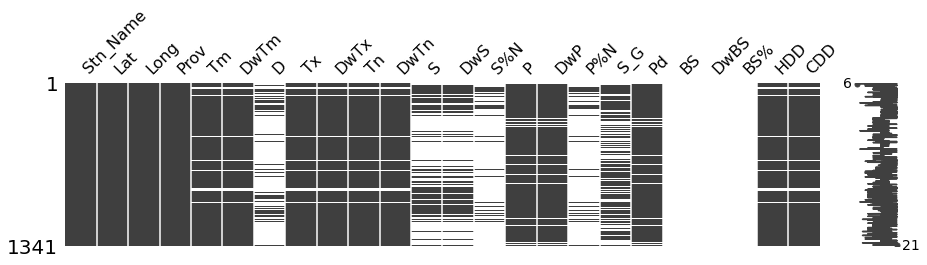

In [112]:
msno.matrix(df_5, figsize=(15, 3))

#### Распределение данных

In [113]:
df_5.Stn_Name.value_counts()

KEY LAKE             3
TROIS-RIVIERES       2
NORTH COWICHAN       2
BAS CARAQUET         2
LETHBRIDGE           2
                    ..
ST HIPPOLYTE         1
SHINGLE POINT A      1
VERNON NORTH         1
CROSS LAKE JENPEG    1
DAKOTA WEST          1
Name: Stn_Name, Length: 1318, dtype: int64

In [114]:
df_5.Prov.value_counts()

BC    274
AB    230
QC    227
ON    181
SK     90
MB     78
NU     60
NL     59
NT     38
NS     36
NB     30
YT     24
PE     14
Name: Prov, dtype: int64

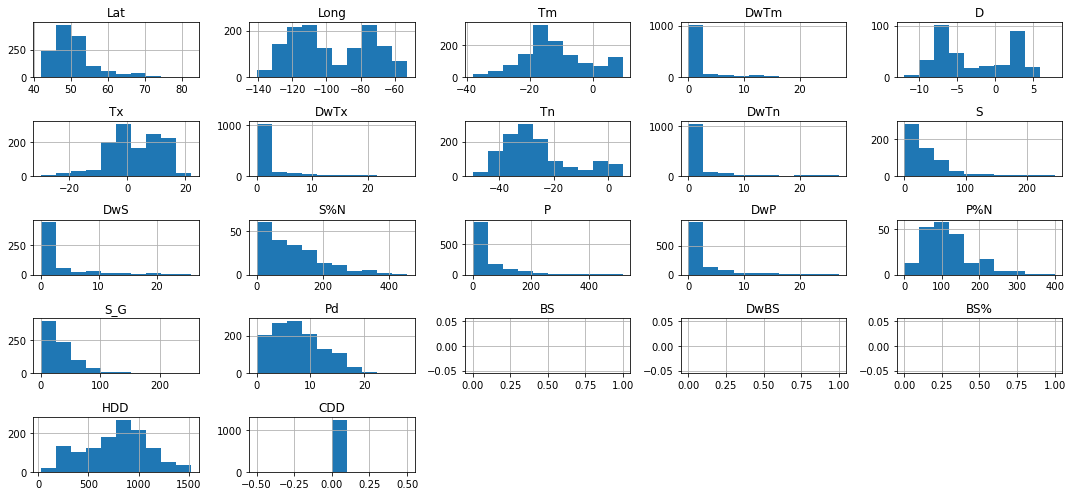

In [115]:
df_5.hist(figsize=(15, 7))
plt.tight_layout()

### Подготовка

#### Пропущенные значения

In [116]:
df_5_without_na = df_5.copy()
df_5_without_na.drop(columns=['BS', 'DwBS', 'BS%', 'S%N', 'P%N', 'D', 'DwS', 'S', 'S_G'], inplace=True)
df_5_without_na

,Stn_Name,Lat,Long,Prov,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
Stn_No,,,,,,,,,,,,,,,
1011500,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0
1012040,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0
1012055,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0
1012475,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012573,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502800,NAIN A,56.550,-61.683,NL,-22.6,0.0,-6.8,0.0,-33.5,0.0,46.6,0.0,5.0,1136.5,0.0
8502801,NAIN A,56.551,-61.682,NL,-19.2,24.0,-7.5,17.0,NaN,NaN,25.2,17.0,4.0,148.7,0.0
8503249,SAGLEK,58.333,-62.586,NL,-24.4,2.0,-13.5,1.0,-32.3,1.0,NaN,NaN,NaN,1101.2,0.0


<AxesSubplot:>

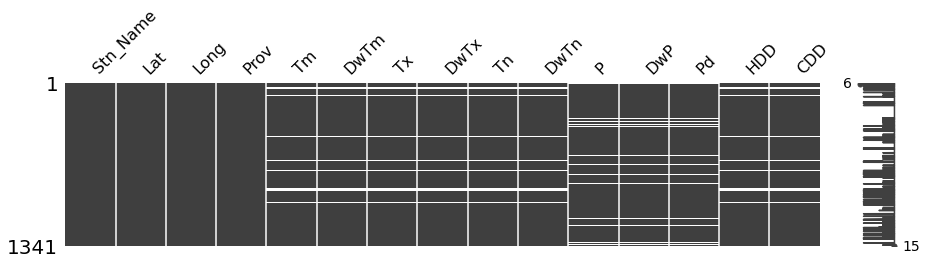

In [117]:
msno.matrix(df_5_without_na, figsize=(15, 3))

<AxesSubplot:>

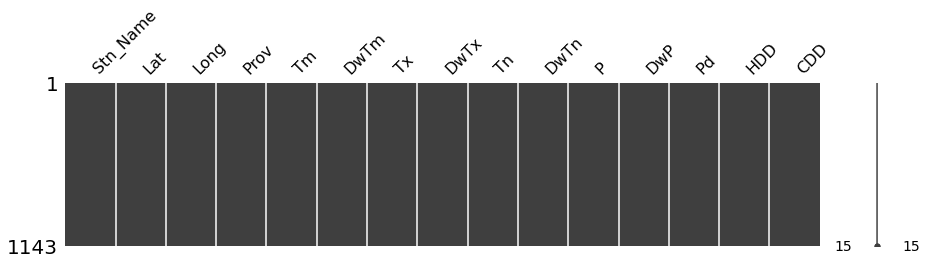

In [118]:
df_5_without_na.dropna(inplace=True)
msno.matrix(df_5_without_na, figsize=(15, 3))

#### Масштабирование

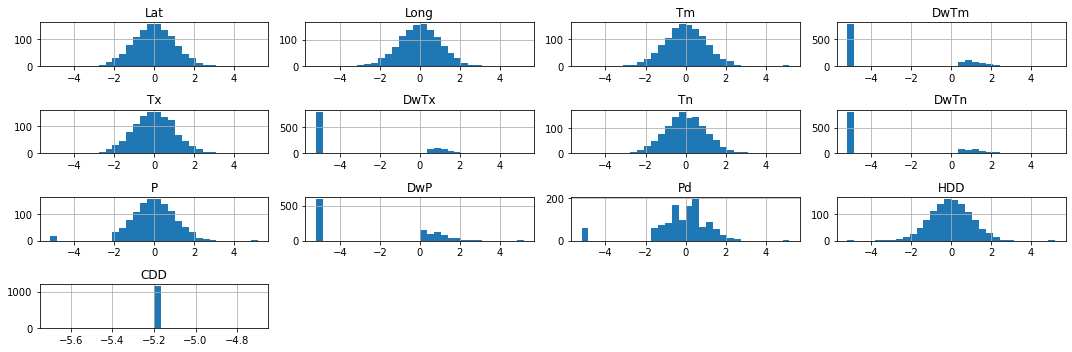

In [119]:
num_cols = df_5_without_na.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution='normal', n_quantiles=100)
# norm_trans = StandardScaler()
df_5_norm = pd.DataFrame(norm_trans.fit_transform(df_5_without_na[num_cols]), columns=num_cols)
df_5_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

#### Категориальные признаки

In [120]:
#TODO

In [121]:
%load_ext autotime

time: 230 µs (started: 2021-06-16 18:33:15 +03:00)


### N-D PCA

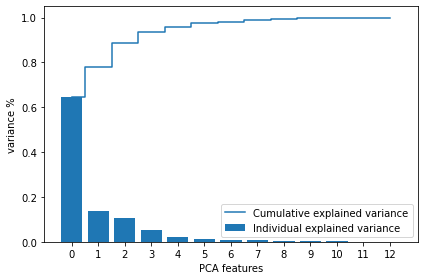

time: 408 ms (started: 2021-06-16 18:33:15 +03:00)


In [122]:
pca = PCA()
pca.fit(df_5_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

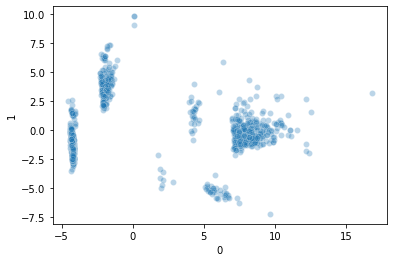

time: 218 ms (started: 2021-06-16 18:33:16 +03:00)


In [123]:
pca_2 = PCA(n_components=2)
df_5_pca_2 = pd.DataFrame(pca_2.fit_transform(df_5_norm))
sns.scatterplot(x=df_5_pca_2[0], y=df_5_pca_2[1], alpha=0.3)

### 2-D t-SNE

<AxesSubplot:xlabel='0', ylabel='1'>

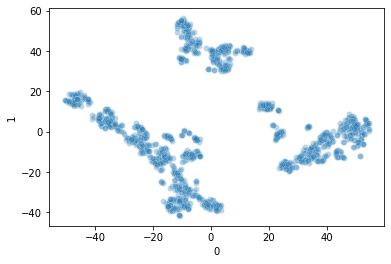

time: 3.22 s (started: 2021-06-16 18:33:16 +03:00)


In [124]:
tsne_2 = TSNE(n_components=2)
df_5_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df_5_norm))
sns.scatterplot(x=df_5_tsne_2[0], y=df_5_tsne_2[1], alpha=0.3)

### 2-D UMAP

<AxesSubplot:xlabel='0', ylabel='1'>

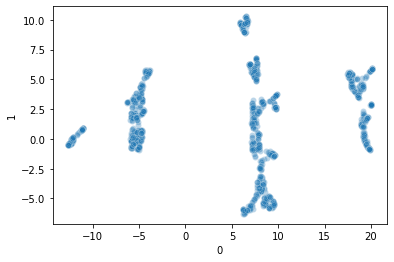

time: 4.29 s (started: 2021-06-16 18:33:19 +03:00)


In [125]:
umap_2 = UMAP(n_components=2)
df_5_umap_2 = pd.DataFrame(umap_2.fit_transform(df_5_norm))
sns.scatterplot(x=df_5_umap_2[0], y=df_5_umap_2[1], alpha=0.3)

### 3-D PCA

In [126]:
pca_3 = PCA(n_components=3)
df_5_pca_3 = pd.DataFrame(pca_3.fit_transform(df_5_norm))
df_5_pca_3

,0,1,2
0,-4.160058,-2.486551,-3.055503
1,-4.197316,-2.498520,-2.958940
2,9.116140,-1.237450,-3.647341
3,7.580545,-1.336862,-3.177880
4,-1.588397,2.923296,-5.265418
...,...,...,...
1138,-1.743364,3.598144,-1.869619
1139,8.009167,0.591894,1.506010
1140,-4.329040,-0.789158,2.341981
1141,-4.326391,-0.775422,2.363756


time: 18.3 ms (started: 2021-06-16 18:33:23 +03:00)


In [147]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-160, elev=40)

ax.scatter(df_5_pca_3[0], df_5_pca_3[1], df_5_pca_3[2],
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 38.7 ms (started: 2021-06-16 18:35:33 +03:00)


In [128]:
%matplotlib inline

time: 3.53 ms (started: 2021-06-16 18:33:23 +03:00)


### 3-D t-SNE

In [129]:
tsne_3 = TSNE(n_components=3)
df_5_tsne_3 = pd.DataFrame(tsne_3.fit_transform(df_5_norm))

time: 8.51 s (started: 2021-06-16 18:33:23 +03:00)


In [148]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-145, elev=30)

ax.scatter(df_5_tsne_3[0], df_5_tsne_3[1], df_5_tsne_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 41.2 ms (started: 2021-06-16 18:35:36 +03:00)


In [131]:
%matplotlib inline

time: 7.28 ms (started: 2021-06-16 18:33:32 +03:00)


### 3-D UMAP

In [132]:
umap_3 = UMAP(n_components=3)
df_5_umap_3 = pd.DataFrame(umap_3.fit_transform(df_5_norm))

time: 5.12 s (started: 2021-06-16 18:33:32 +03:00)


In [149]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=65, elev=35)

ax.scatter(df_5_umap_3[0], df_5_umap_3[1], df_5_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

time: 42.6 ms (started: 2021-06-16 18:35:39 +03:00)


In [150]:
%matplotlib inline

time: 2.51 ms (started: 2021-06-16 18:35:43 +03:00)
